In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../data/processed/cleaned_feature_set.csv', index_col = 0)
df

,Solar Energy (kWh),Inverter 1 Energy (kWh),Inverter 2 Energy (kWh),Daylength in decimal hours,Billing Period Duration (Days),Billable kWh,Power Bill Total,Tesla Bill Total,Total Cost
Billing Period End,,,,,,,,,
12/17/2021,590.2,282.2,307.8,251.94,30,1123,195.13,185,380.13
1/19/2022,366.8,77.1,289.7,266.70,32,2046,347.39,185,532.39
2/16/2022,738.0,355.5,382.6,244.05,27,829,146.63,185,331.63
3/21/2022,1280.5,608.4,672.1,320.33,32,160,36.27,185,221.27
4/19/2022,1323.8,641.0,682.7,312.83,28,473,87.90,185,272.90
5/18/2022,1511.0,736.2,775.2,339.47,28,352,61.97,185,246.97
6/17/2022,1546.6,752.0,794.8,369.80,29,882,133.15,185,318.15
7/19/2022,1594.7,775.0,819.6,395.68,31,1410,206.94,185,391.94
8/16/2022,1123.7,547.8,576.0,330.32,27,1448,212.25,185,397.25


In [3]:
df[['Inverter 2 Energy (kWh)']].loc[:'9/19/2022']

,Inverter 2 Energy (kWh)
Billing Period End,
12/17/2021,307.8
1/19/2022,289.7
2/16/2022,382.6
3/21/2022,672.1
4/19/2022,682.7
5/18/2022,775.2
6/17/2022,794.8
7/19/2022,819.6
8/16/2022,576.0


In [4]:
model = ARIMA(df[['Inverter 2 Energy (kWh)']].loc[:'9/19/2022'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Inverter 2 Energy (kWh)   No. Observations:                   10
Model:                      ARIMA(1, 1, 1)   Log Likelihood                 -56.722
Date:                     Wed, 11 Jan 2023   AIC                            119.444
Time:                             15:35:20   BIC                            120.035
Sample:                                  0   HQIC                           118.167
                                      - 10                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3952      2.658      0.149      0.882      -4.815       5.605
ma.L1         -0.1366      2.908     -0.047      0.963      -5.835       5.562
sigma2      

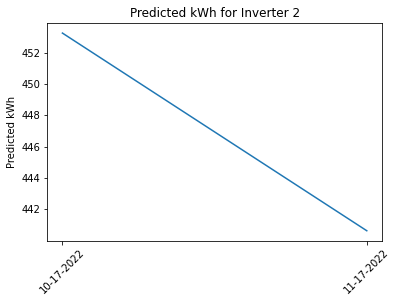

In [5]:
forecast = model_fit.forecast(2)
future_months = ['10-17-2022', '11-17-2022']

forecast_df = pd.DataFrame({'Week': future_months,
                            'Predicted kWh': forecast})

plt.ylabel('Predicted kWh')
plt.xticks(rotation = 45)
plt.title('Predicted kWh for Inverter 2')

plt.plot(future_months, forecast)

plt.show()

In [6]:
forecast_df

,Week,Predicted kWh
10,10-17-2022,453.261637
11,11-17-2022,440.641025


In [7]:
forecast_df['Guaranteed Price/kWh'] = 0.13980
forecast_df['Predicted Cost to Us'] = forecast_df['Predicted kWh'] * forecast_df['Guaranteed Price/kWh']

round(forecast_df['Predicted Cost to Us'].sum(), 2)

124.97

**Tesla owes us ~$125 for energy not generated by Inverter 2 in Oct. and Nov. alone, according to my ARIMA model (based on the `Guaranteed Price/kWh` in the [Solar Lease Agreement](https://github.com/nickmccarty/solar-energy-predictor/blob/main/images/tesla-solar-agreement-screenshot.jpg))!**